# `Inside the Offshores leak`
`Panama Papers as you have never seen it`
***


# Research Question 1

> Which economic factors motivate the foundation of offshore companies? Which role does the legal situation in the origin country play compared to the legal situation in the offshore country? In particular, are off-shores used also to avoid higher wages and better working conditions imposed by countries legislation?

### Importing libs

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import requests
from bs4 import BeautifulSoup
import folium
import json
import networkx as nx
from utils import visualizers_1, preprocessing_1,computations_1, visualizer_q3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline
import json
import folium
import requests
%load_ext autoreload
%autoreload 2

# Extracting data 

In [5]:
addresses = r'./panama_csv/Addresses.csv'
entities = r'./panama_csv/Entities.csv'
coordinates = r'./panama_csv/coordinates.csv'
edges = r'./panama_csv/all_edges.csv'
intermediaries = r'./panama_csv/Intermediaries.csv'
officers = r'./panama_csv/Officers.csv'

index_2013 = r'./the_index/the_index/index2013_data.xls'
index_2014 = r'./the_index/the_index/index2014_data.xls'
index_2015 = r'./the_index/the_index/index2015_data.xls'
index_2016 = r'./the_index/the_index/index2016_data.xls'
index_2017 = r'./the_index/the_index/index2017_data.xls'
#addresses = pd.read_csv(addresses,index_col='node_id', header=0, low_memory=False)
entities = pd.read_csv(entities, header=0, low_memory=False)
entities_c = entities.copy()

index_2013 = pd.read_excel(index_2013,index_col = 'Country Name',header=0)
index_2014 = pd.read_excel(index_2014,index_col = 'Country Name',header=0)
index_2015 = pd.read_excel(index_2015,index_col = 'Country Name',header=0)
index_2016 = pd.read_excel(index_2016,index_col = 'Country Name',header=0)
index_2017 = pd.read_excel(index_2017,index_col = 'Country Name',header=0)
#coordinates = pd.read_csv(coordinates, index_col='Country', header=0, low_memory=False)
#officers = pd.read_csv(officers, index_col='node_id', header=0, low_memory=False)
#intermediaries = pd.read_csv(intermediaries, index_col='node_id', header=0, low_memory=False)
#edges = pd.read_csv(edges,header=0, low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: './the_index/the_index/index2013_data.xls'

## Explaining the data:

<h1><center>**~~ Panama Papers ~~**</center></h1>

**Introduction: ** 

This database contains information on almost 500,000 offshore entities that are part of the Panama Papers, the Offshore Leaks and the Bahamas Leaks investigations. The data covers nearly 40 years – from 1977 through to early 2016 – and links to people and companies in more than 200 countries and territories. The real value of the database is that it strips away the secrecy that cloaks companies and trusts incorporated in tax havens and exposes the people behind them. This includes, when available, the names of the real owners of those opaque structures.

The dataset is divided into 5 **main** csv files :
* Addresses
* Edges
* Entities
* Intermediaries
* Officers

In this project we are focusing on the relationships between the countries involved.Briefly here is the list of our research questions.

1. How the number of offshores that are founded from an origin country in tax havens is related to economical factors of the origin country?
2. Which roles does the legal situation in the origin country play compared to the legal situation in the offshore country?
3. How are the countries connected? Is there a pattern in the way players in origin counrties select special countries for their offshores.
4. There is a hypothesis that scandals involving tax havens actually help to promote creating offshores there. Can we find evidence for this in the data?

To look through those questions into more details, we use the **csv** file named **Entities** which contains the connections between the origin and tax haven countries and use the help of the dataset **Index Of Economics Freedom** to understand the economical/legal parameters of each country.

<h1><center>**~~ Index Of Economics Freedom ~~**</center></h1>

**Introduction:**

Economic freedom is the fundamental right of every human to control his or her own labor and property. In an economically free society, individuals are free to work, produce, consume, and invest in any way they please. In economically free societies, governments allow labor, capital, and goods to move freely, and refrain from coercion or constraint of liberty beyond the extent necessary to protect and maintain liberty itself. The Index covers 12 economic freedoms, objective measurements, historical background, and policy analysis of 186 economies troughout the world. The 12 economic freedoms are grouped into four pillars of economic freedom:

**1. Rule of law:**

 * **Property rights:** is an assessment of the ability of individuals to accumulate private property, secured by clear laws that are fully enforced by the state. It measures the degree to which a country’s laws protect private property rights and the degree to which its government enforces those laws.
 * **Government integrity:** "Corruption" is the abuse of entrusted power for private gain. It can be classified as grand, petty and political, depending on the amounts of money lost and the sector where it occurs.
 * **Judicial effectiveness: ** Well-functioning civil justice systems protect the rights of all citizens against infringement of the law by others, including by powerful parties and governments. An essential component of the rule of law is indeed based on effective and fair judicial systems to ensure that the laws are respected and appropriate sanctions are taken when they are violated.
 
**2. Government Size:**

 * **Government spending:** Considers the level of government expenditures as a percentage of GDP. General government expenditure data include all levels of government such as federal, state, and local. Research have shown that excessive government spending that causes chronic budget deficits and the accumulation of sovereign debt is one of the most serious drags on economic dynamism.
 * **Tax burden:** is a measure of the tax burden imposed by government. It includes direct taxes, in terms of the top marginal tax rates on individual and corporate incomes, and overall taxes, including all forms of direct and indirect taxation at all levels of government, as a percentage of GDP.
 * **Fiscal health:** A government’s budget is one of the clearest indicators of the extent to which it respects the principle of limited government. Widening deficits and a growing debt burden, both of which are direct consequences of poor government budget management, lead to the erosion of a country’s overall fiscal health.
 
**3. Regulatory Efficiency:**

 * **Business freedom:**  is an overall indicator of the efficiency of government regulation of business. Individual’s ability to establish and run an enterprise without undue interference from the state is one of the most fundamental indicators. It is formed from several factors:
   * Starting a business [ Procedure / Time / Cost / Minimum capital ]
   * Obtaining a license [ Procedure / Time / Cost ]
   * Closing a business [ Time / Cost / Recovery rate ]
 * **Labor freedom:**  is a quantitative measure that considers various aspects of the legal and regulatory framework of a country’s labor market, including regulations concerning minimum wages, laws inhibiting layoffs, severance requirements, and measurable regulatory restraints on hiring and hours worked.
 * **Monetary freedom:**  combines a measure of price stability with an assessment of price controls. Both inflation and price controls distort market activity. Price stability without microeconomic intervention is the ideal state for the free market.
 
**4. Open Markets:**

 * **Trade freedom:**  is a composite measure of the absence of tariff and non-tariff barriers that affect imports and exports of goods and services.The trade freedom score is based on two inputs:
   * The trade-weighted average tariff rate.
   * Non-tariff barriers (NTBs). The categories considered are:
     * Quantity restrictions.
     * Price restrictions.
     * Regulatory restrictions.
     * Customs restrictions.
     * Investment restrictions.
     * Direct government intervention.
 * **Investment freedom:** Describes the constraints on the flow of investment capital. Individuals and firms would be allowed to move their resources into and out of specific activities, both internally and across the country’s borders, without restriction. Countries have different rules for foreign and domestic investment; some restrict access to foreign exchange; some impose restrictions on payments, transfers, and capital transactions; in some, certain industries are closed to foreign investment. Labor regulations, corruption, red tape, weak infrastructure, and political and security conditions can also affect the freedom that investors have in a market.
 * **Financial freedom:** is a measure of banking efficiency as well as a measure of independence from government control and interference in the financial sector. It is calculated by looking at those broad areas:
   * The extent of government regulation of financial services.
   * The degree of state intervention in banks and other financial firms through direct and indirect ownership.
   * The extent of financial and capital market development.
   * Government influence on the allocation of credit.
   * Openness to foreign competition.


Add the monetary measures

In [ ]:
# As shown above, the features of the index of economical freedom
# are divided into 5 categories.

# Here is the division of the categories we discussed earlier.
open_markets_data = ['Trade Freedom','Investment Freedom ','Financial Freedom']
regulatory_efficiency_data = ['Business Freedom','Labor Freedom','Monetary Freedom']
rule_of_law_data = ['Property Rights','Government Integrity','Judical Effectiveness']
government_size_data = ['Gov\'t Spending','Fiscal Health','Tax Burden']
economical_data = ['GDP (Billions, PPP)','GDP Growth Rate (%)','GDP per Capita (PPP)'\
                   ,'Gov\'t Expenditure % of GDP ','Inflation (%)',\
                   'FDI Inflow (Millions)','Public Debt (% of GDP)']
# Years.
years = ['2017', '2016', '2015', '2014','2013']

### Cleaning the datasets and concatenating them into a single dataframe.

In [3]:
# Cleaning process.
index_2013 = preprocessing_1.cleaning_index_data(index_2013,'2012')
index_2014 = preprocessing_1.cleaning_index_data(index_2014,'2013')
index_2015 = preprocessing_1.cleaning_index_data(index_2015,'2014')
index_2016 = preprocessing_1.cleaning_index_data(index_2016,'2015')
index_2017 = preprocessing_1.cleaning_index_data(index_2017,'2016')
# Concatenating all the datasets.
economical_indexes = pd.concat([index_2017,index_2016,index_2015,index_2014,index_2013])

AttributeError: 'builtin_function_or_method' object has no attribute 'tolist'

In [4]:
jurisdiction_country = computations_1.jurisdiction_country_data(entities,500,500,0)
jurisdiction_count = computations_1.jurisdiction_country_data(entities,0,0,0)
total_jurisdiction_count = computations_1.jurisdiction_country_data(entities,0,0,1)

AttributeError: 'str' object has no attribute 'drop'

### Total jurisdiction count with unavailable data.

##### In here we will visualize the total number of offshore accounts opened in the Tax haven countries. Including the ones where the origin country is missing.
##### The goal is to visualize the total number of accounts created regardless if the origin country data is present.

In [ ]:
visualizers_1.visualize_jurisdiction_count(total_jurisdiction_count)

### Those we have data about 

In [ ]:
visualizers_1.visualize_jurisdiction_count(jurisdiction_count)

##### We can see that there is huge amount of missing data from the Bahamas, specifically what are the countries involved. However this still indicates that the Bahamas is a favourable Tax Haven country and will be included in the analysis further on.

### Countries involved
##### In here we will visualize the total number of offshore accounts opened by each country in the dataset.

In [ ]:
visualizers_1.visualize_country_count(jurisdiction_count)

##### We can notice from the countries listed, some Tax Haven countries are included, this will be investigated more in the section below.

### Countries most involved in opening offshore accounts.
##### From the visualization above we can extract the countries that are in our opinion worth investigating.

In [ ]:
countries = ['Bahamas','Cyprus','Isle of Man','Jersey','Luxembourg','Panama',\
             'Russia','Switzerland','Taiwan','United Arab Emirates','United Kingdom',\
            'United States','Hong Kong','British Virgin Islands','Guernsey','Singapore',\
            'China','Liechtenstein','Uruguay','Latvia','Monaco','Gibraltar']

##### In here we are visualizing the distribution of the entities from the origin countries in the Tax Haven countries. This analysis will be carried on further in the coming sections

In [ ]:
visualizers_1.visualize_specific_count(countries,jurisdiction_country)

We have 40 countries in the database which are considered as jurisdiction countries or may be considered as the Tax Haven Countries. From those we will investigate only the countries with more than 500 Offshore accounts.

Most important countries to be investigated:
* Switzerland
* Hong Kong 
* United Kingdom
* United Arab Emirates
* Luxembourg

### Comparing several economical factors between the most involved countries

## Extracting information from Economic Index based on column name

In [ ]:
# Top countries involved.
lead_countries=['Switzerland','Hong Kong','United Kingdom','United Arab Emirates','Luxembourg']
# Tax havens that we have data about in the economics index with most number of offshore entities.
# Write why we don't have about others ?
haven_countries = ['Panama','Bahamas','Samoa','Seychelles']
# Both top countries and Tax Havens.
both_countries = ['Switzerland','Hong Kong','United Kingdom','United Arab Emirates','Luxembourg','Panama','Bahamas','Samoa','Seychelles']

In [ ]:
visualizers_1.visualizing_index_data(economical_indexes,lead_countries,economical_data,years)

In [ ]:
visualizers_1.visualizing_index_data(economical_indexes,lead_countries,open_markets_data,years)

In [ ]:
visualizers_1.visualizing_index_data(economical_indexes,lead_countries,regulatory_efficiency_data,years)

In [ ]:
visualizers_1.visualizing_index_data(economical_indexes,lead_countries,rule_of_law_data,years)

In [ ]:
visualizers_1.visualizing_index_data(economical_indexes,lead_countries,government_size_data,years)

In [ ]:
visualizers_1.visualizing_index_data(economical_indexes,both_countries,rule_of_law_data,years)

### Visualizing the correlation of features between the involved countries.

In [ ]:
countries_involved = computations_1.compute_countries_involved(jurisdiction_country,0)
countries_involved_data = computations_1.compute_countries_involved_data(index_2017,countries_involved)

In [ ]:
visualizers_1.visualize_feature_correlation(countries_involved_data,open_markets_data)

In [ ]:
visualizers_1.visualize_feature_correlation(countries_involved_data,regulatory_efficiency_data)

In [ ]:
visualizers_1.visualize_feature_correlation(countries_involved_data,rule_of_law_data)

In [ ]:
visualizers_1.visualize_feature_correlation(countries_involved_data,government_size_data)

In [ ]:
#Nan_countries_values = collections.Counter(entities.loc[entities['countries'].isnull()]['jurisdiction_description'])
#not_Nan_countries_values = collections.Counter(entities.loc[entities['countries'].notnull()]['jurisdiction_description'])
#jurisdiction_country.iloc[jurisdiction_country.index.get_level_values('jurisdiction_description') == 'Wyoming']
#counter = collections.Counter(entities.loc[:,'countries'])

# Research Question 2

> How are the countries connected? Is there a pattern in the
way players in origin countries select special countries for
their offshores?

*For every combination of two countries that occur in the data
we count the number of offshores founded in one country
coming from the other country and vice versa.*

## Importing libraries

In [7]:
entities = r'./panama_csv/Entities.csv'
entities = pd.read_csv(entities,index_col='name', header=0, low_memory=False)
entities=entities.rename(columns = {'countries':'Country'})

In [8]:
entities.head()

,original_name,former_name,jurisdiction,jurisdiction_description,company_type,address,internal_id,incorporation_date,inactivation_date,struck_off_date,dorm_date,status,service_provider,ibcRUC,country_codes,Country,note,valid_until,node_id,sourceID
name,,,,,,,,,,,,,,,,,,,,
"TIANSHENG INDUSTRY AND TRADING CO., LTD.","TIANSHENG INDUSTRY AND TRADING CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001256.0,23-MAR-2006,18-FEB-2013,15-FEB-2013,NaN,Defaulted,Mossack Fonseca,25221,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000001,Panama Papers
"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.","NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001263.0,27-MAR-2006,27-FEB-2014,15-FEB-2014,NaN,Defaulted,Mossack Fonseca,25249,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000002,Panama Papers
"HOTFOCUS CO., LTD.","HOTFOCUS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000896.0,10-JAN-2006,15-FEB-2012,15-FEB-2012,NaN,Defaulted,Mossack Fonseca,24138,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000003,Panama Papers
"SKY-BLUE GIFTS & TOYS CO., LTD.","SKY-BLUE GIFTS & TOYS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000914.0,06-JAN-2006,16-FEB-2009,15-FEB-2009,NaN,Defaulted,Mossack Fonseca,24012,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000004,Panama Papers
FORTUNEMAKER INVESTMENTS CORPORATION,FORTUNEMAKER INVESTMENTS CORPORATION,NaN,SAM,Samoa,NaN,LOYAL PORT LIMITED 8/F; CRAWFORD TOWER 99 JERV...,1001266.0,19-APR-2006,15-MAY-2009,15-FEB-2008,NaN,Changed agent,Mossack Fonseca,R25638,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000005,Panama Papers


The dataset contains 495038 data points, one per revealed offshore entity. In this part of the analysis we are mainly concerned with origin and goal countries of the offshore entities. The origin country can be found in the column "Country", the goal tax heaven in the column "jurisdiction_descrition". We find 519 different origin countries and 40 different goal countries.

In [9]:
len(entities)

495038

In [10]:
len(entities.Country.unique())

519

In [11]:
len(entities.jurisdiction_description.unique())

40

## Cleaning the data

A closer inspection of the data revealed that there are missing values encoded by 'Not identified', 'Undetermined', and 'Recorded in leaked files as "fund"'. We convert them to NaN. Furthermore, we observed occurences of 'United States Of America' as well as 'United States'. in order to have consistent names we rename them all to 'United States'.

In [12]:
# reencode missing values
entities.Country.replace('Not identified',np.NaN, inplace=True)
entities.jurisdiction_description.replace(['Undetermined', 'Recorded in leaked files as "fund"'],np.NaN, inplace=True)
# consistent naming
entities.jurisdiction_description.replace('United States Of America','United States', inplace=True)

## Computing the cross table of frequencies 

As mentionned above, we want to count for every combination of two countries that occur in the data the number of offshores founded in one country coming from the other country and vice versa.
The frequencies of relations can be computed using the pandas function `crosstab`.

In [13]:
crosstable = pd.crosstab(entities.Country, [entities.jurisdiction_description], rownames=['origin'], colnames=['destination'])
crosstable.tail()

destination,Bahamas,Belize,Bermuda,British Anguilla,British Virgin Islands,Brunei,Cayman,China,Cook Islands,Costa Rica,...,Samoa,Seychelles,Singapore,St. Lucia,Thailand,United Kingdom,United States,Uruguay,Vanuatu,Wyoming
origin,,,,,,,,,,,,,,,,,,,,,
Viet Nam,2,0,0,0,4,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Viet Nam;British Virgin Islands,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zambia,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zimbabwe,0,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


A closer observation of the country names shows that some offshore entities have more than one origin country. The countries are specified in one data row and the names are seperated by ';', see for example the origin value 'Viet Nam;British Virgin Islands'. For the analysis of the relations between origin and goal countries we decided to count such relations for all of the specified origin countries.

Therefore, we refactor the crosstable by duplicating the rows with several origin countries once for every origin country. As this might result in having more than one row per origin country, in the end we group by origin country and sum up all the values. Furthermore, we again drop the row corresponding to the country value 'Not identified'.

Furthermore, in a seperate analysis we investigate which countries occur together as origin countries.

In [14]:
#duplicating the rows
multiple_orig = pd.DataFrame(columns = crosstable.reset_index().columns)
for index, row in crosstable.reset_index().iterrows():
    for orig in row['origin'].split(';'):
        multiple_orig = multiple_orig.append(pd.concat([pd.Series({'origin' : orig}), row[1:]]), ignore_index=True)
multiple_orig.head()

destination,origin,Bahamas,Belize,Bermuda,British Anguilla,British Virgin Islands,Brunei,Cayman,China,Cook Islands,...,Samoa,Seychelles,Singapore,St. Lucia,Thailand,United Kingdom,United States,Uruguay,Vanuatu,Wyoming
0,Albania,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,American Samoa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Andorra,26,0,0,0,39,0,0,0,0,...,9,72,0,0,0,1,0,15,0,0
3,Angola,0,0,0,0,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Anguilla,0,0,0,21,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#sum up values for each country
crosstable = multiple_orig.groupby('origin').sum()
crosstable = crosstable.drop('Not identified')

In [16]:
crosstable.to_csv('crosstable.csv')

For the further analysis we consider not absolute frequencies but the relative frequencies of destination countries for every origin country. Hence, we perform a row wise normailzation.

In [17]:
#row wise normalization
crosstable_norm = crosstable.div(crosstable.sum(axis=1), axis=0)

## 2.1. Relations between origin and goal countries

In order to be able to find a pattern in the
way players in origin countries select special countries for
their offshores, we cluster the origin countries into groups with similar selection data. The clustering is performed using KMeans with a k-means++ initialization and a maximum of 300 iterations. The number of clusters is determined as the number with the maximal average silhouette. We set the maximal number of clusters for the comparison to 10. It turns out that the optimal number of clusters is 4.

In [18]:
from sklearn.cluster import KMeans

max_n_clusters = 10
scores = []
clusters = []
# try for nr of clusters up to specified max and chose clustering with optimal silhouette
for n_clusters in range(2, max_n_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(crosstable_norm)
    clusters.append(kmeans.labels_)
    scores.append(sklearn.metrics.silhouette_score(crosstable_norm, kmeans.labels_))

n_clusters = np.argmax(scores)
crosstable_norm['cluster'] = clusters[n_clusters]

print(n_clusters + 2)

4


In the following plot we visualize for each of the four resulting clusters the relative frequencies for the corresponding countries. It becomes apparent that the first cluster contains those countries where the majority of offshore entities are founded on the British Virgin Islands. The second cluster contains the countries with most offshore entities in Panama, the third those countries with a mojority of entities on the Seychelles. The countries in the fourth cluster show more diverse distributions of destination countries. We observe that for many countries in this cluster the main destination of entities is the country itself, see for example the Cook Islands or Samoa.

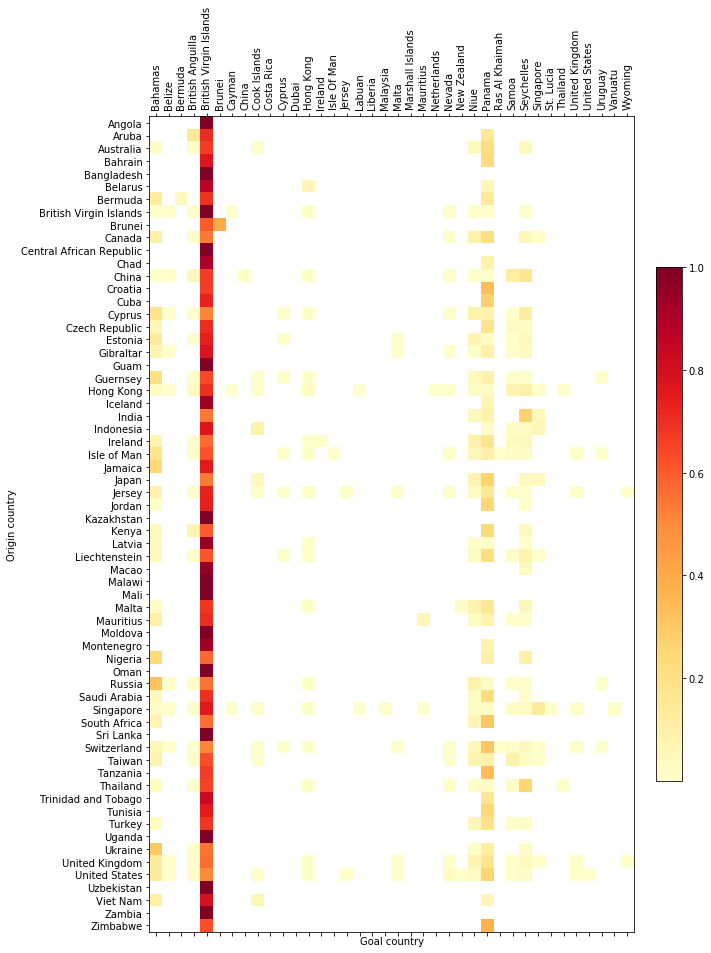

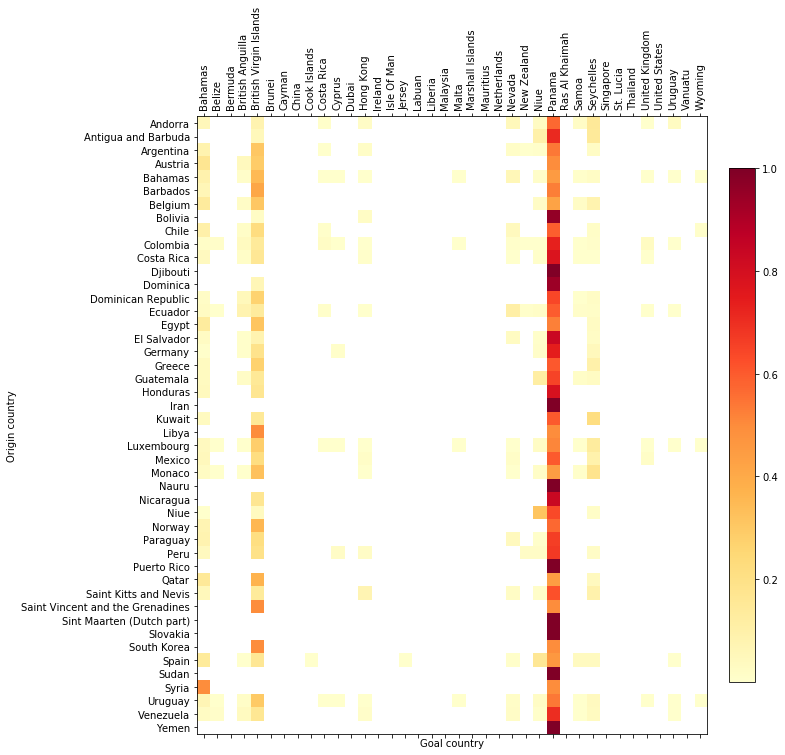

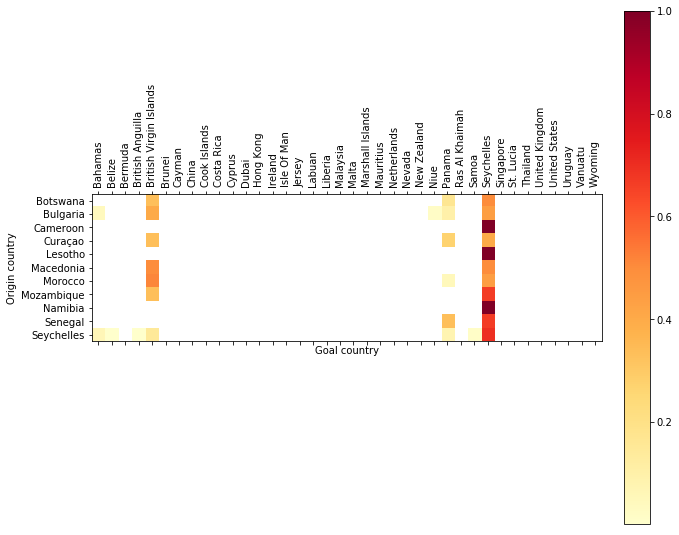

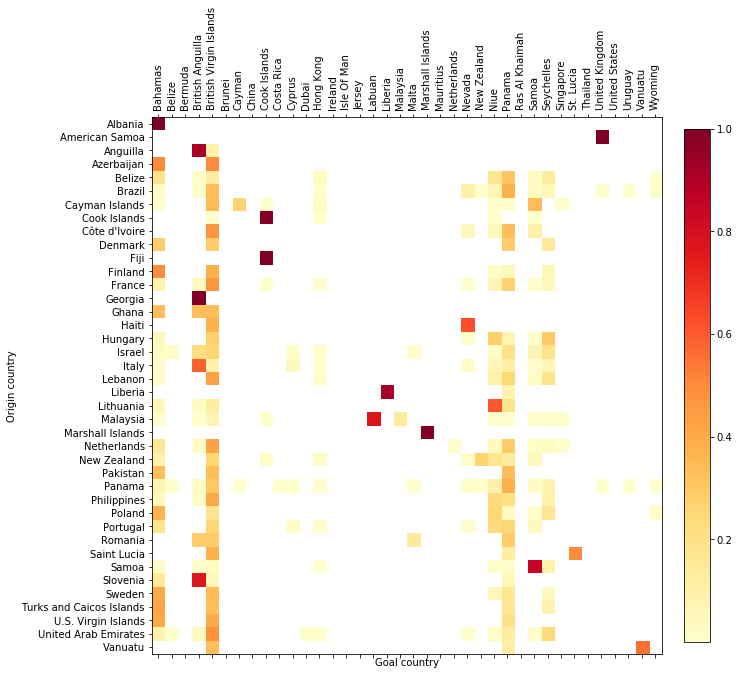

In [19]:
#plot frequencies for each cluster
for i in range(n_clusters + 2):
    visualizer_q3.plot_cross_table(crosstable_norm[crosstable_norm.cluster == i].drop('cluster', axis=1))

In order to better understand the underlying structures that lead to those patterns of selection of destination countries, we want to find similarities of the countries which are in the same cluster. The first thing we consider is geographical closeness. Therefore we display a map where countries in the same cluster have the same color. Form the map it becomes apparent most South American countries (Brasil being the most apparent exception) have the majority of offshore entities in Panama (cluster 2). In Northern America and the UK, most offshore entities are founded on the British Virgin Islands.

In [20]:
# information that is needed for the map
cluster_info = crosstable_norm.reset_index()[['origin', 'cluster']]

In [21]:
# load information about countries in the world
world_topojson_path = r'json/world-countries.json'
world_topojson = json.load(open(world_topojson_path))
url = 'https://restcountries.eu/rest/v2/'
restcountries, nametoid = visualizer_q3.buildJsonAPI(url)

Republic of Kosovo has problem with numeric code None


In [22]:
# fix naming problems
nametoid['Bolivia'] = 68
nametoid['British Virgin Islands'] = 92
nametoid['Brunei'] = 96
nametoid['Iran'] = 368
nametoid['Macedonia'] = 807
nametoid['Moldova'] = 498
nametoid['Russia'] = 643
nametoid['South Korea'] = 410
nametoid['Syria'] = 760
nametoid['Tanzania'] = 834
nametoid['U.S. Virgin Islands'] = 850
nametoid['United Kingdom'] = 826
nametoid['United States'] = 840
nametoid['Venezuela'] = 862

In [23]:
#add ids to countries in order to match them with topojson data
cluster_info['id'] = cluster_info.origin.apply(lambda x: restcountries[nametoid[x]]['alpha3Code'])

In [24]:
# create map
m = folium.Map([46.8,8], 
               tiles='cartodbpositron', 
               zoom_start=1)

In [25]:
# add the chororpleth and dispay map
visualizer_q3.addChoropleth(cluster_info, m, 'cluster','Cluster', 'id','YlGnBu', world_topojson,'objects.countries1')
m

We want to find futrther reasons for those patterns by considering historical and economic background information. While the historical background requires a per country research, we plan to investigate the economic factors by comparing the distributions of the measures specified Index of Eonomic freedom data set between the four different clusters.

## 2.2. Relations between origin countries

In this section we want to further analyze which countries occur together as origin countries. We plan to follow the same steps of analysis as in the previous section.

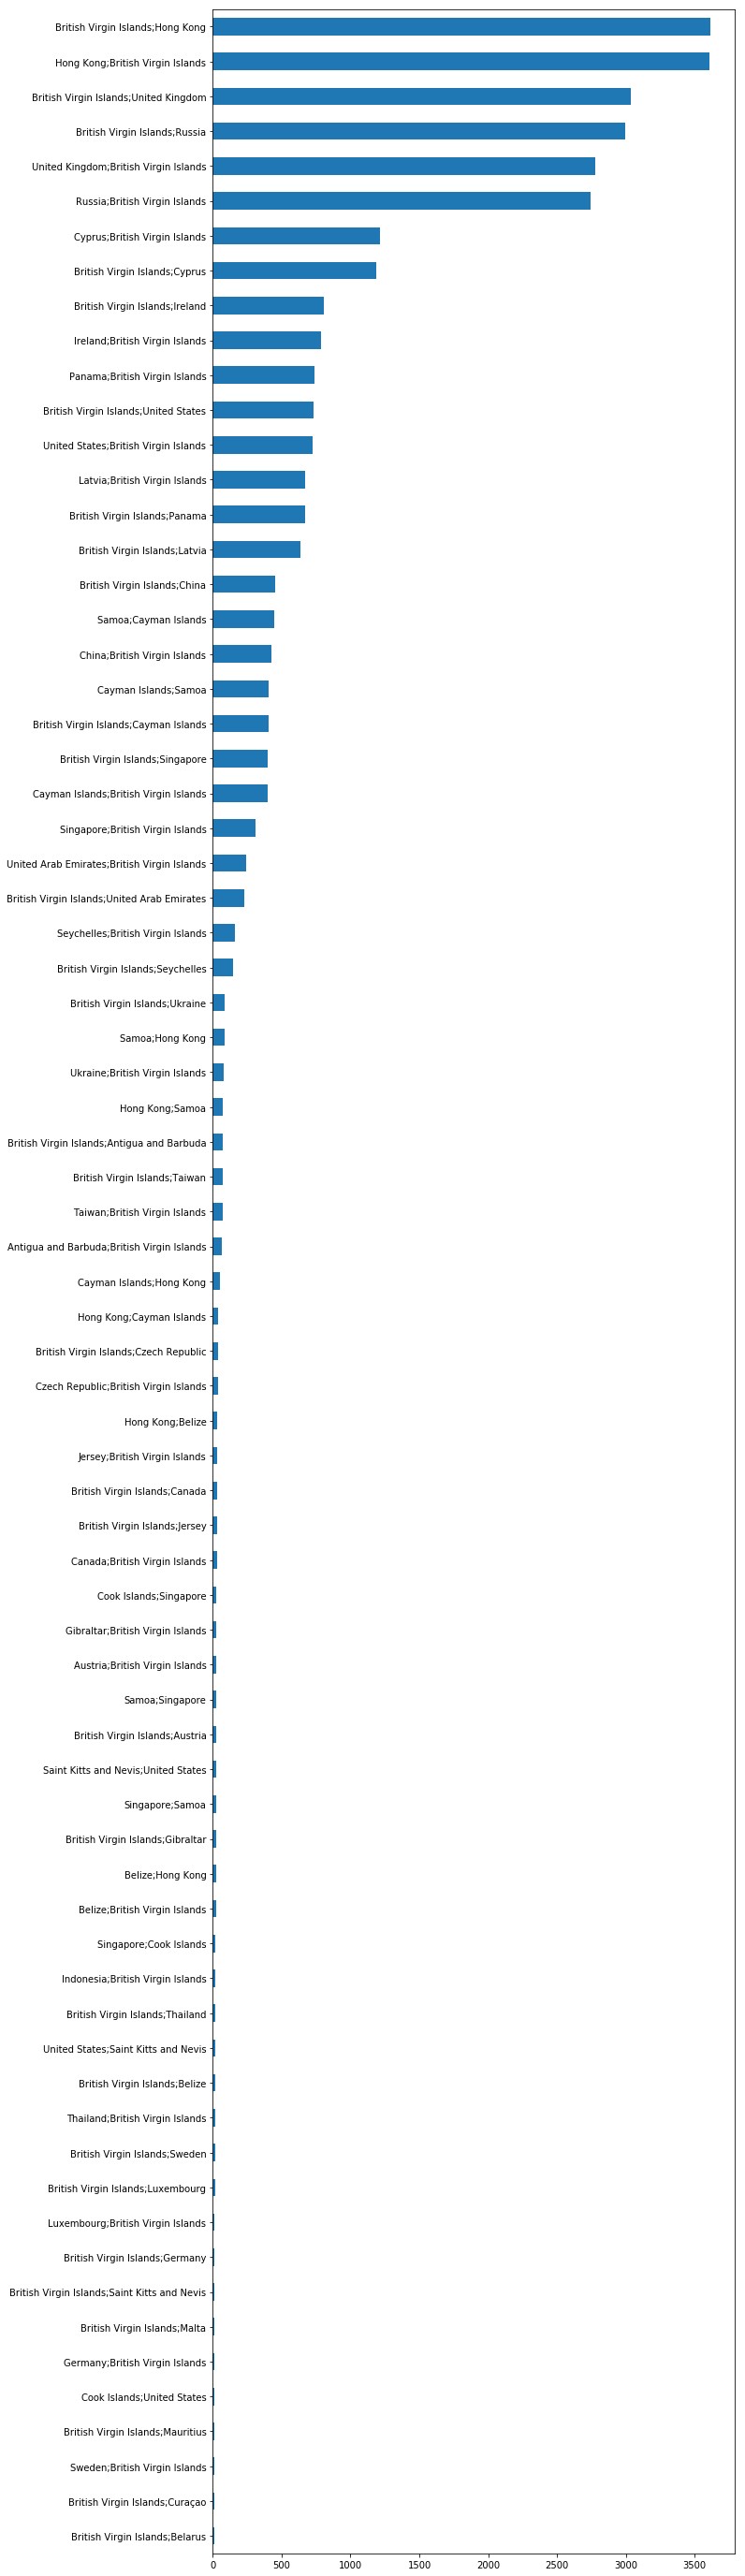

In [26]:
#plot for first superficial analsis
countries = entities.Country.dropna()
counts = countries[countries.str.contains(';') & ~(countries.str.contains('Not identified'))].value_counts()
ax = counts[counts >= 10].plot(kind='barh', figsize=(10, 50))
ax.invert_yaxis()

We observe that if more than one origin country is specified, one of them is very often the British Virgin Islands. We guess this might be due to special legal requirements for founding an entity there. (TODO: verify).

In [27]:
#split the strings into the different country names for further analysis
split = pd.DataFrame(entities.Country.dropna()[entities.Country.dropna().str.contains(';')].str.split(';').tolist(), columns = ['origin1','origin2', 'origin3', 'origin4'])#

In [28]:
#get unique values, this will be the rows / cols of the crosstabke
vals = split.values.flatten()
vals = np.unique(vals[vals != np.array(None)])

# Research Question 3
> ##### There is a hypothesis that scandals involving tax havens actually help to promote creating offshores there. 
See for example [International Strategic Analysis](http://www.isa-world.com/news/?tx_ttnews%5BbackPid%5D=1&tx_ttnews%5Btt_news%5D=198&cHash=10b412a7de63d3b2a02adf0d120a09f6). Can we find evidence for this in the data?

## Most important leaks
Here is a list of the most important leaks documented by the International Consortium of Investigative Journalists [ICIJ](https://offshoreleaks.icij.org/)
- **Bahamas Leak** ->
April 2, 2013
- **China Leak ⭐️** ->
January 21, 2014
- **Lux Leak** ->
December 9, 2014
- **Swiss Leak** ->
February 8, 2015 
- **Panama Leak** ->
April 3, 2016 

### Importing libs
___

In [31]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgetsimport

In [32]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
#Import new style
plt.style.use('bmh')

In [33]:
from utils import visualizer, preprocessing

### Loading csv files

In [34]:
entities = r'./panama_csv/Entities.csv'
entities = pd.read_csv(entities,index_col='name', header=0, low_memory=False)
entities=entities.rename(columns = {'countries':'Country'})

## Getting the most involved countries/jurisdictions.
___
From the Entities dataset we select:
- **15 most involved countries**, on which we compute our analysis. Those countries are the countries that have the highest number of offshores accounts in tax haven jurisdictions.
- **5 most involved jurisdictions**, on which we compute our analysis. Those jurisdictions are the jurisdictions that are managing / managed the highest registered number of offshores accounts worldwide.

### What do we do?

For each of the most involved countries/jurisdictions we analyze how much are they involved and what's their behavior throughout the years. 

1. We define how much each jurisdiction is involved by looking at how many offshores accounts are registered in it.
2. We define how much those countries are involved by looking at how many offshores accounts are registered from this country as country of origin.

It's important to note that we want to look also at the number of **new incorporations** - **inactivations** and **active offshores** for every year.

The number of new incorporations as the number of inactivations for each year is easily derived by the dataset since for each account there it's registered the date of incorporation as the one of inactivation. 
The number of actives offshores in one year is easily computed with a simple algorithm given the dates above.

### Why?

To state wheter one scandals has visible worldwide consequences we must base our analysis on the number of, in this way analyzing:
- **new incorporations**, this number can give us the proof is one scandal actually acted as a marketing tool, inviting people of one specific **COUNTRY** to invest in offshores account in one specific tax haven **JURISDICTION**.
- **inactivations**, this number can give us the proof is one scandal scared people in one specific **COUNTRY** that are actually investing in one specific tax haven **JURISDICTION**.

We are also interested to look at key events or particular years where the global market has undergone a major change. To do this we will look at the behavior of the most involved countries throughout the years, how they invested, how much and in which jurisdictions.

## Further assumptions.
We must note that all the following results are based on a fraction of the whole real data, which is the only available and emerged. We can consider the eventual results realistics since the data we are analyzing contains a good amount of data. However we cannot exclude that further scandals can obviously revert them.
### Getting most involved countries and jurisdictions
___
We group by __Country/Jurisdiction__, we count the elements sorting by **node_id** which represent the unique id of each offshore account.

In [35]:
most_involved = entities.groupby('Country').count().sort_values('node_id', ascending=False).head(15).index
most_involved = most_involved[most_involved!='Not identified']
most_involved_countries = []
for involved in most_involved:
    if involved == 'British Virgin Islands':
        name = 'Virgin Islands (British)'
    elif involved == 'United Kingdom':
        name = 'United Kingdom of Great Britain and Northern Ireland'
    else:
        name = involved
    most_involved_countries.append(name)

In [36]:
most_involved_jur = entities.groupby('jurisdiction_description').count().sort_values('node_id', ascending=False).head().index
most_involved_jur = most_involved_jur[most_involved_jur!='Undetermined']
most_involved_jur

Index(['Bahamas', 'British Virgin Islands', 'Panama', 'Seychelles'], dtype='object', name='jurisdiction_description')

## Preprocessing dataset
___
We process the entity dataframe to obtain a new dataframe that maps the flows of **inactivations**, **incorporations**, **actives** offshores for each year from one **country** to each **jurisdiction**.

The structure of the new dataframe is composed in this way:
- **jurisdiction**, the name of the jurisdiction where the offshore account is opened.
- **Country**, the name of the origin country of the offshore account.
- **date**, the year that the entry is considering.
- **action**, wheter we are counting incorporations/inactivations/active offshores/strucks off offshores in the specific date described above
- **offshores**, the number directly related to the field action described above in the specific year.

In [37]:
countries_frame = preprocessing.process_countries(entities=entities, first_involved_countries=most_involved, analisys_on='jurisdiction', from_year=1980, to_year=2016)

In [38]:
countries_frame[0].sort_values('date', ascending=False).head()

,Country,date,action,offshores
jurisdiction,,,,
Seychelles,Hong Kong,2016,strucks,37.0
Hong Kong,Hong Kong,2016,strucks,1.0
Bahamas,Hong Kong,2016,active offshores,203.0
Bahamas,Hong Kong,2016,strucks,3.0
British Anguilla,Hong Kong,2016,active offshores,1059.0


## Visualizing situation in the most involved countries

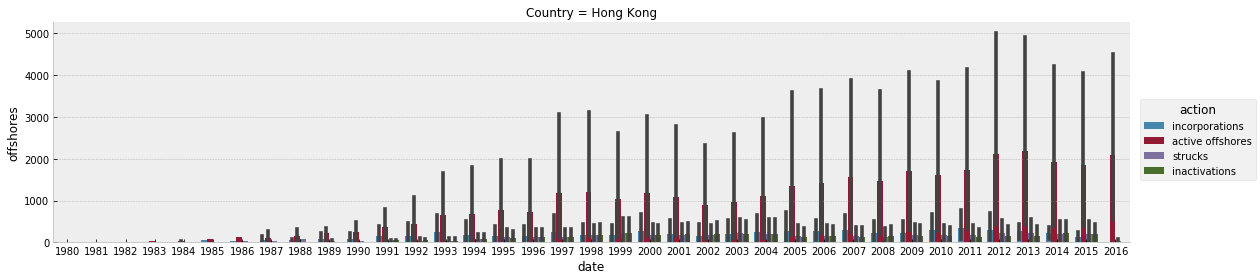

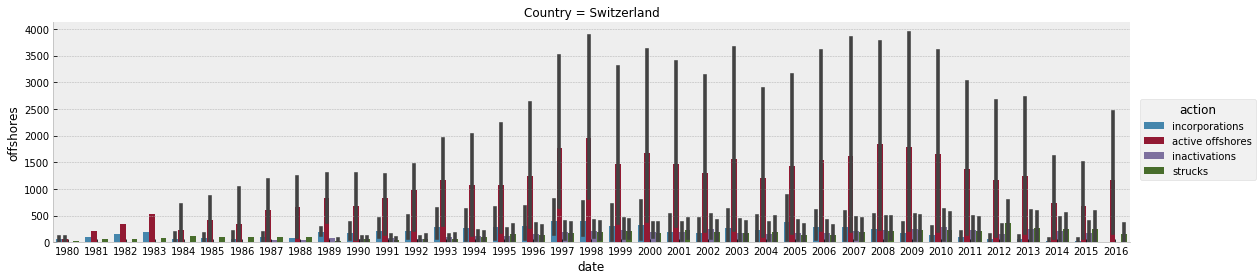

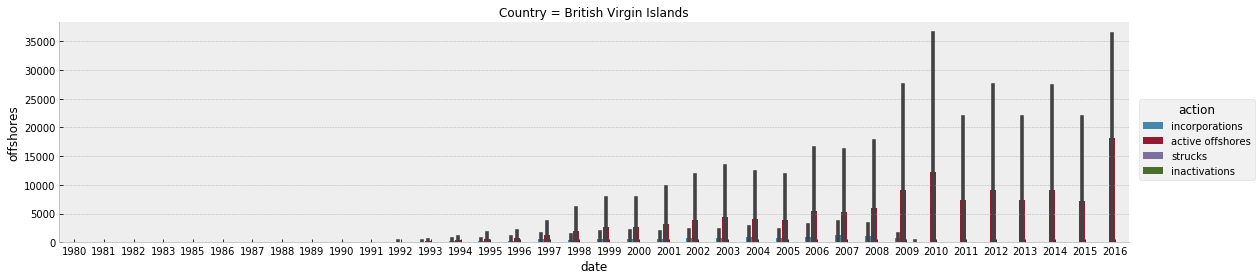

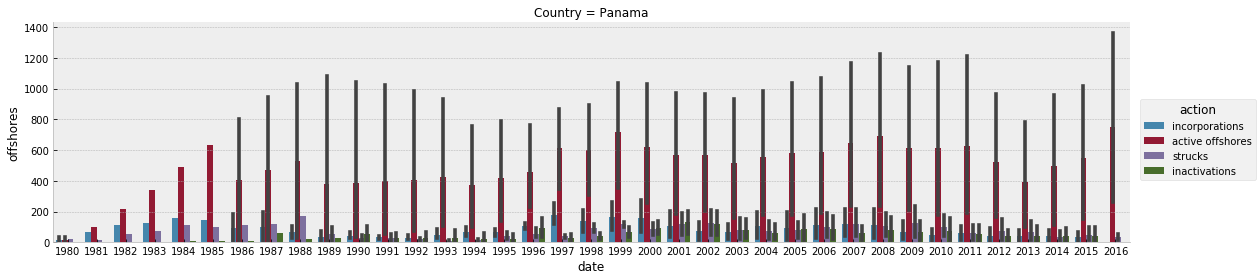

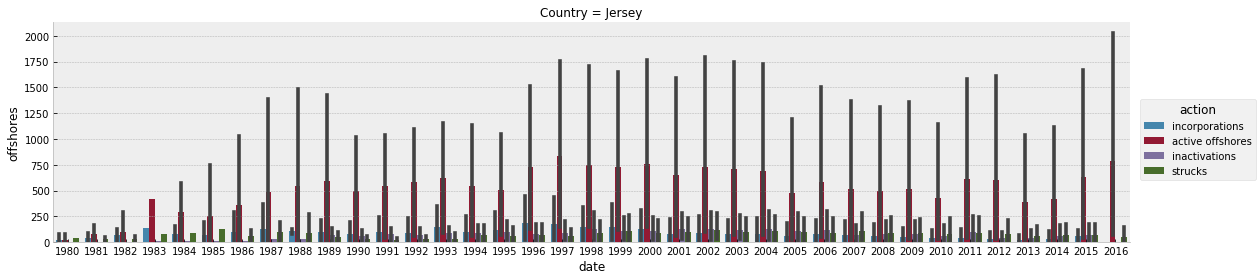

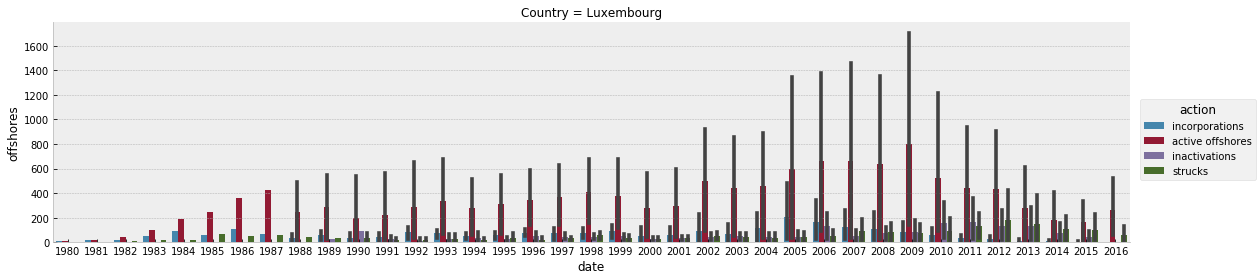

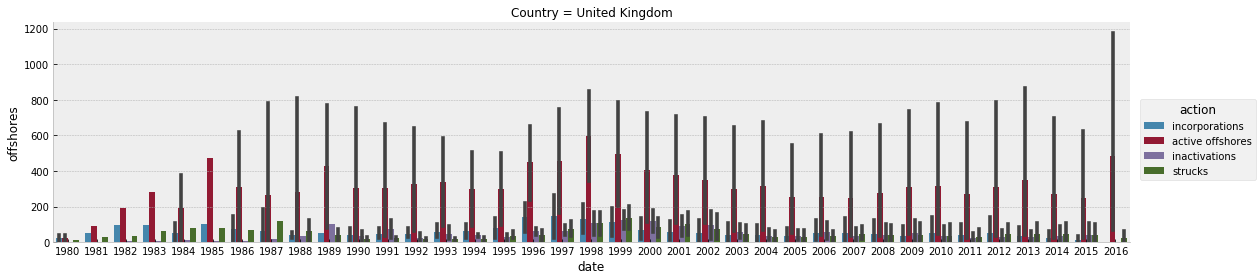

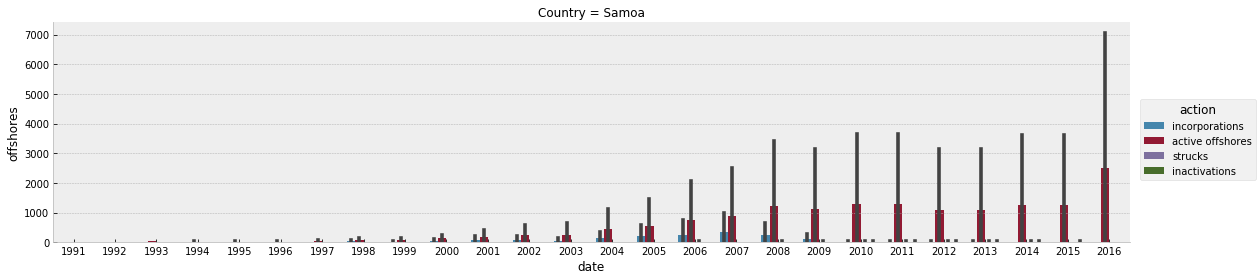

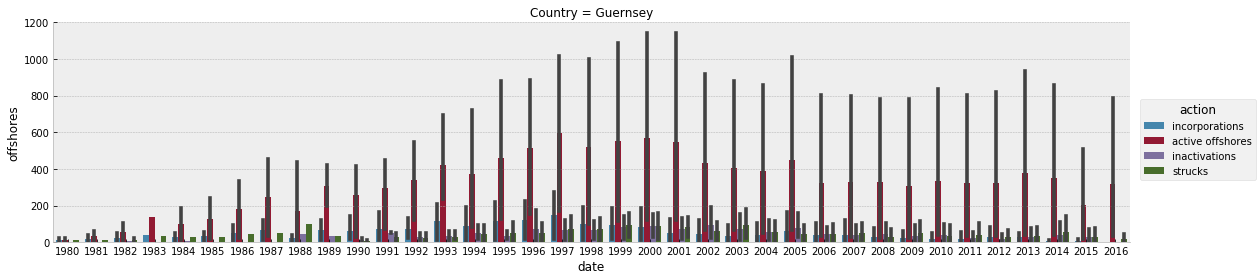

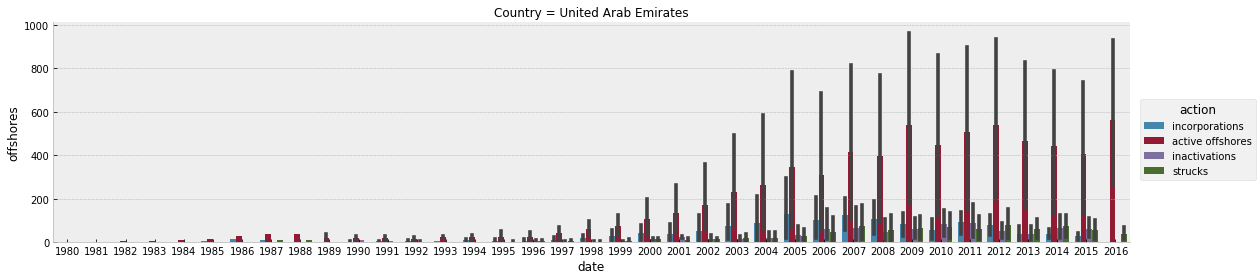

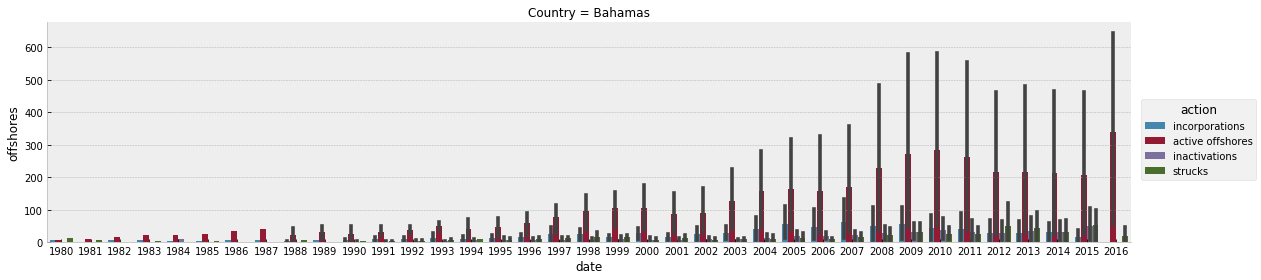

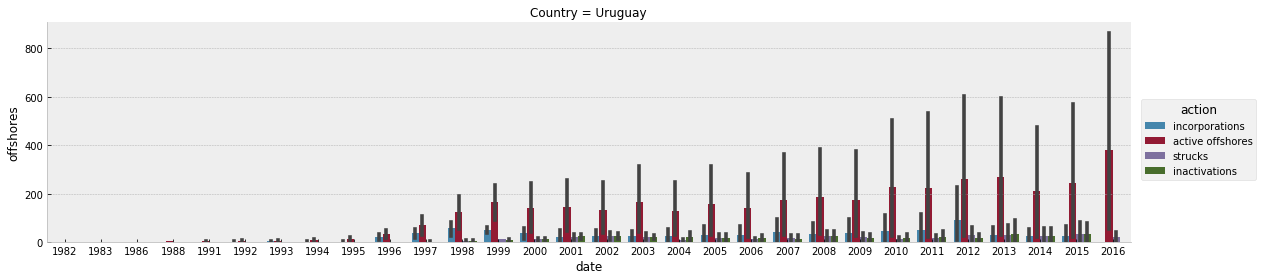

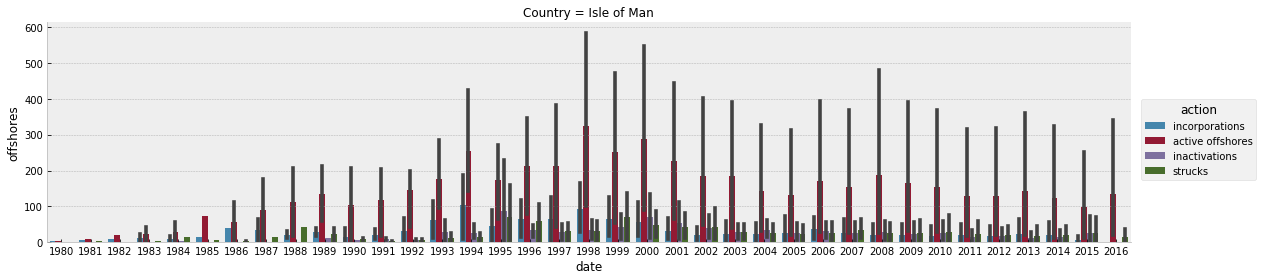

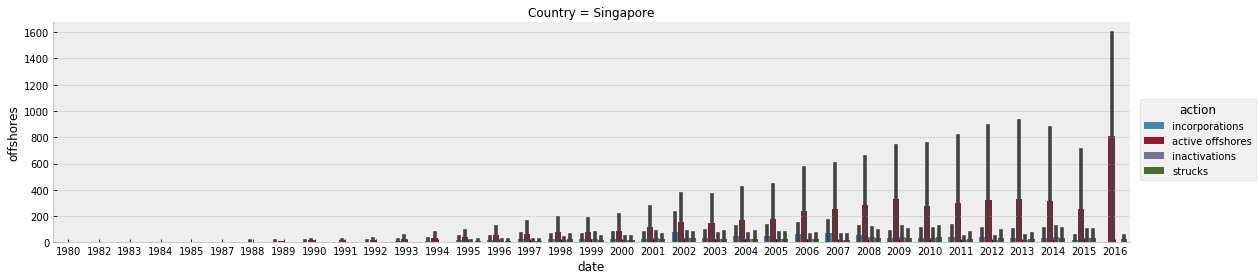

In [39]:
visualizer.visualize_countries_situation(countries_frame, divide_by='Country')

## Visualizing situation in the most involved jurisdictions
___
#### British Virgin Islands


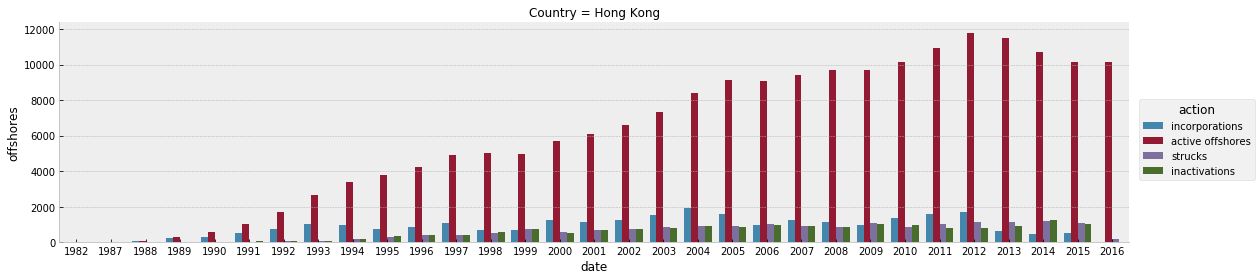

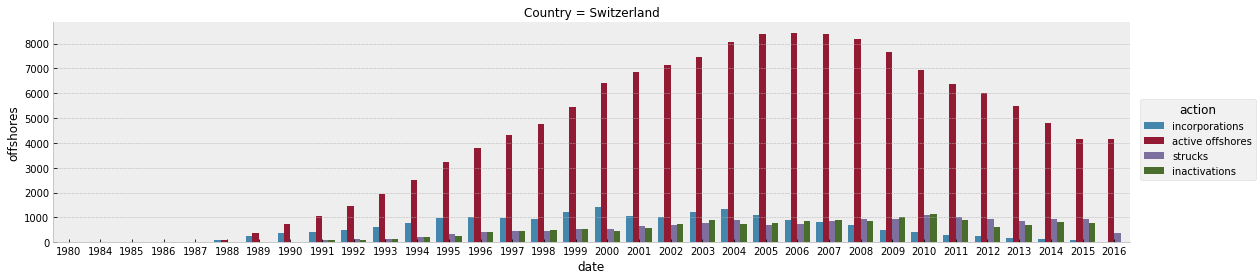

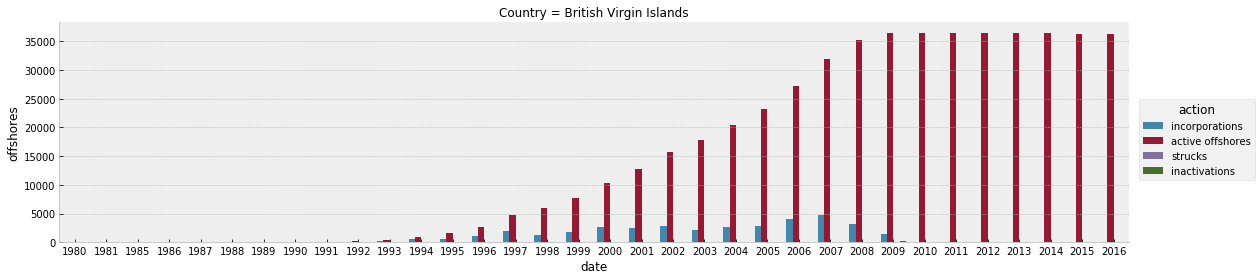

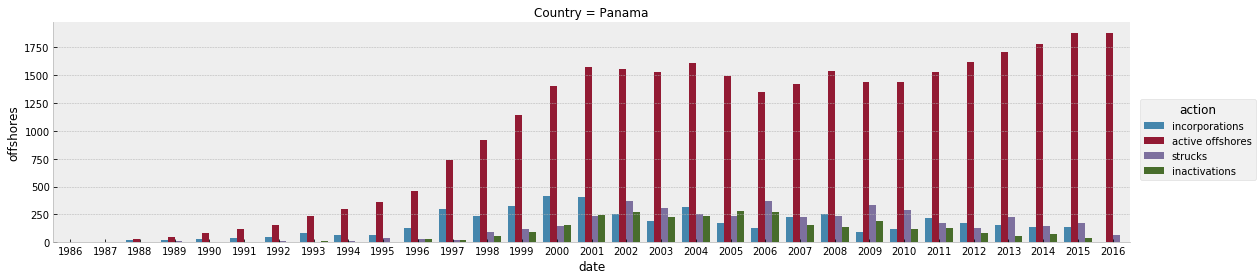

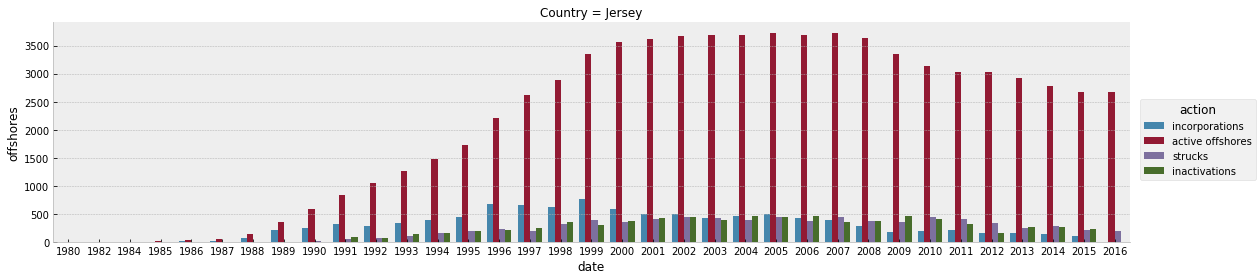

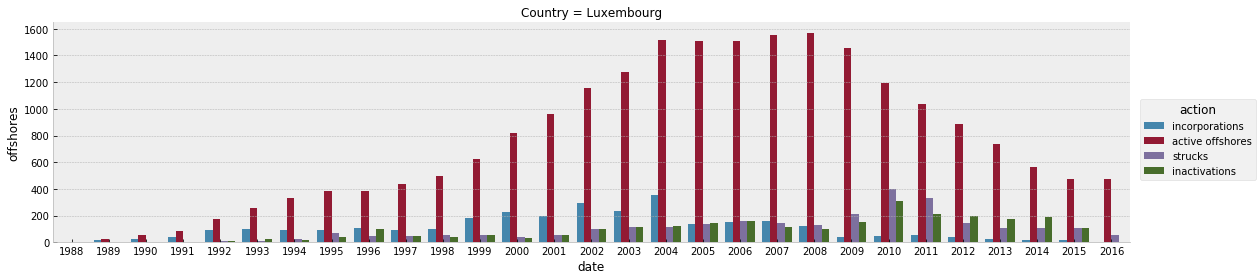

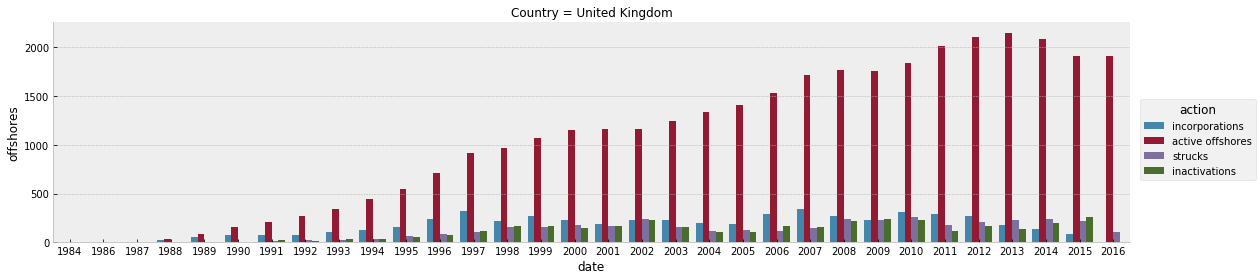

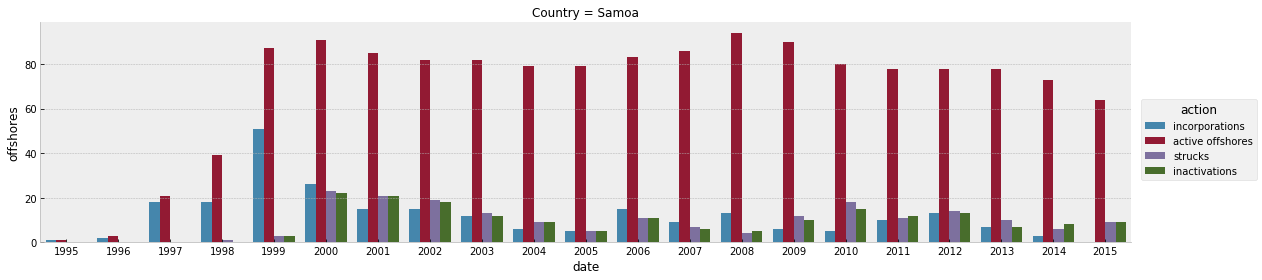

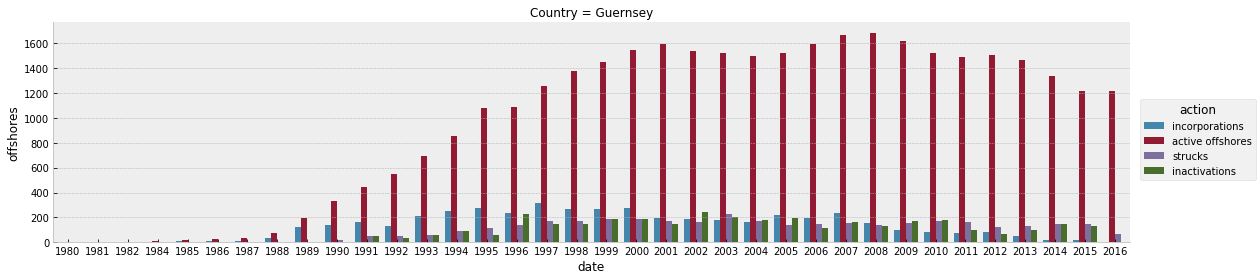

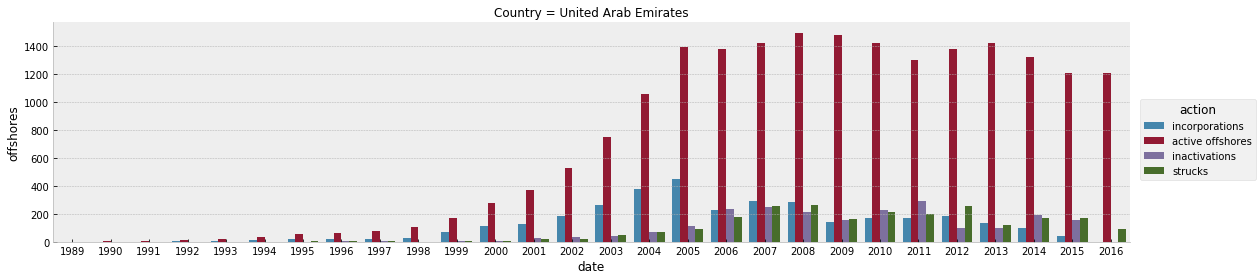

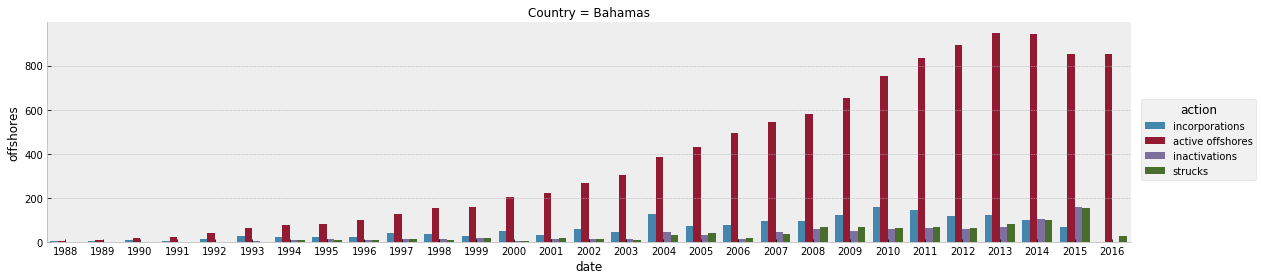

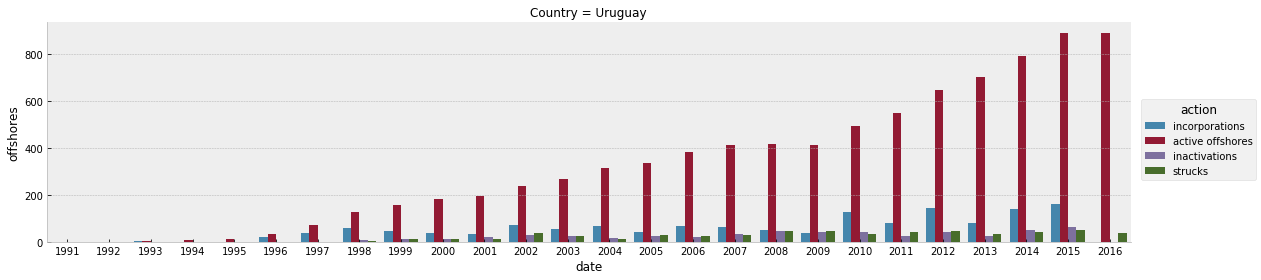

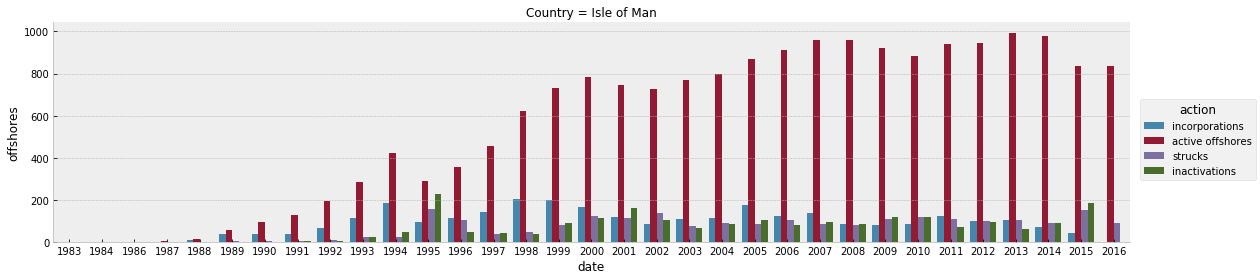

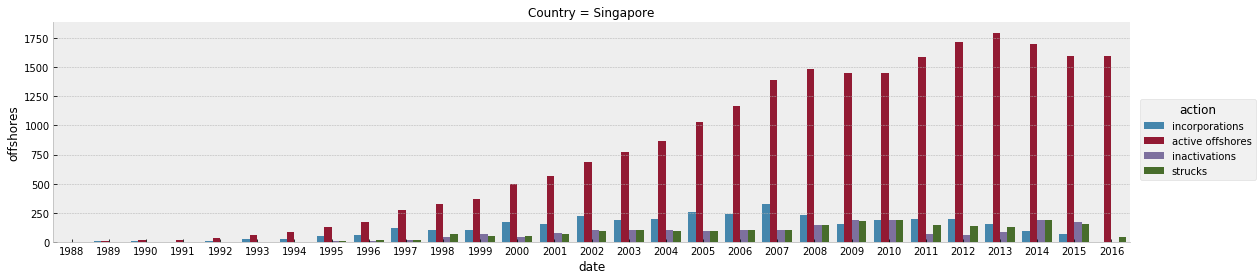

In [40]:
visualizer.visualize_countries_situation(countries_frame, divide_by='Country',selected_jurisdiction='British Virgin Islands')

#### Panama

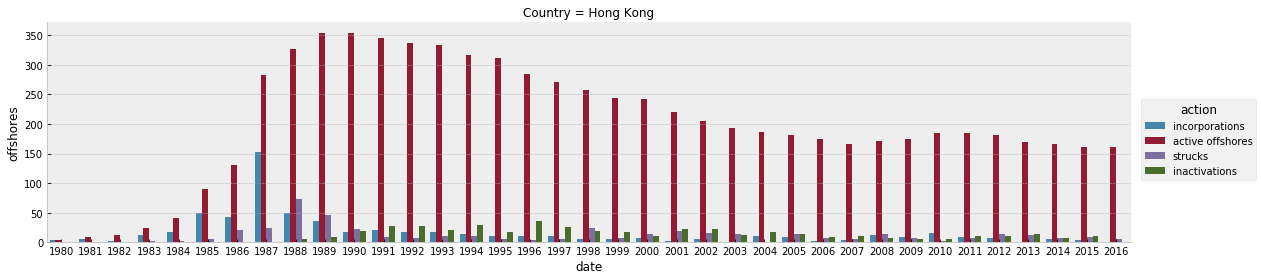

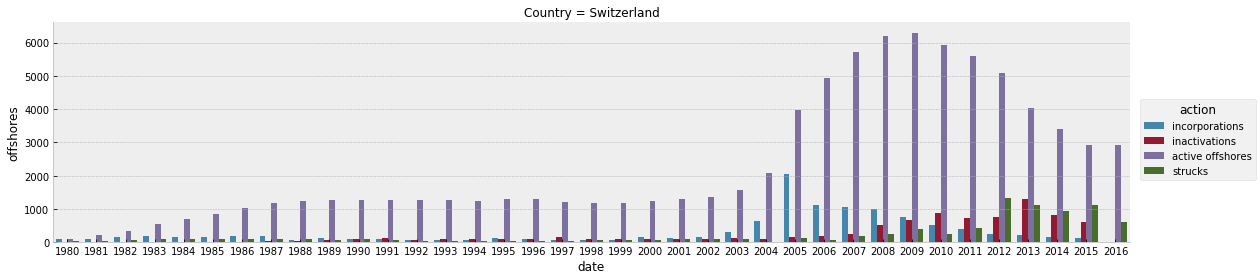

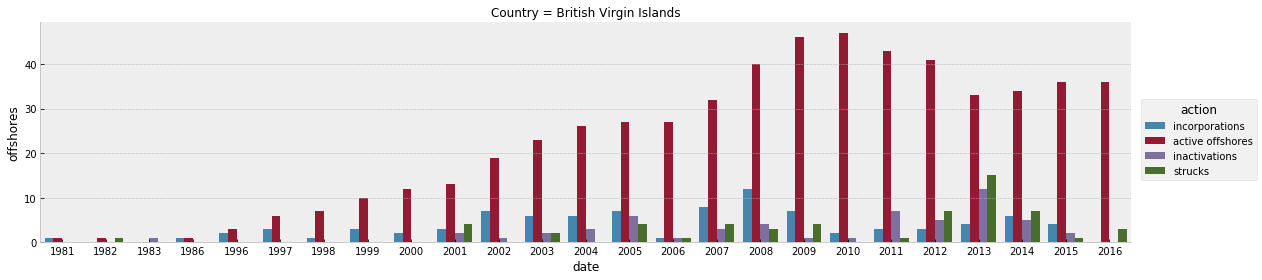

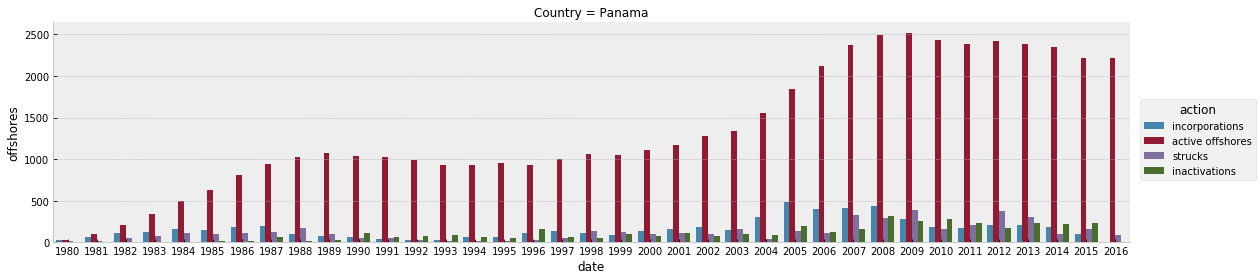

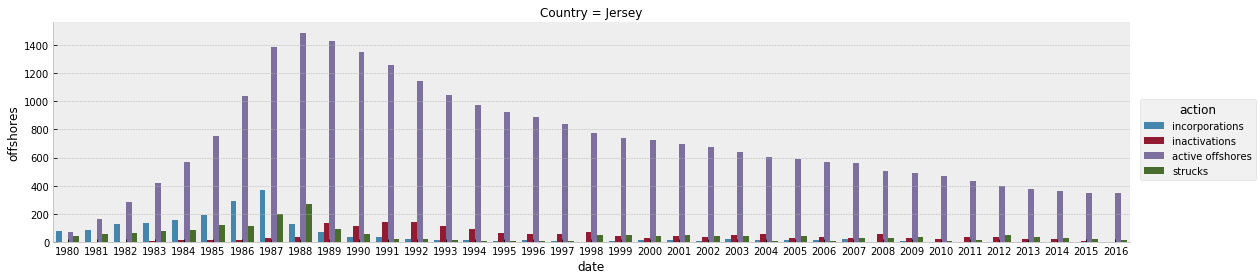

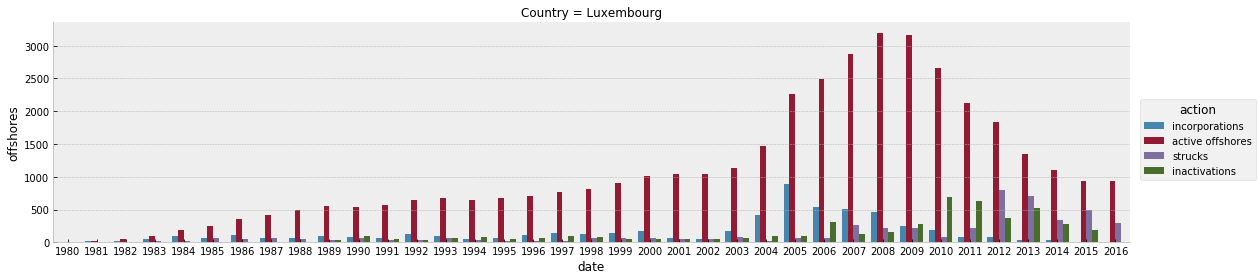

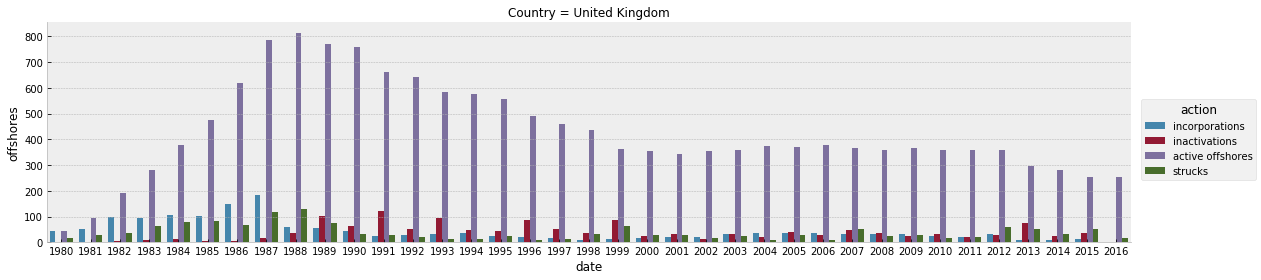

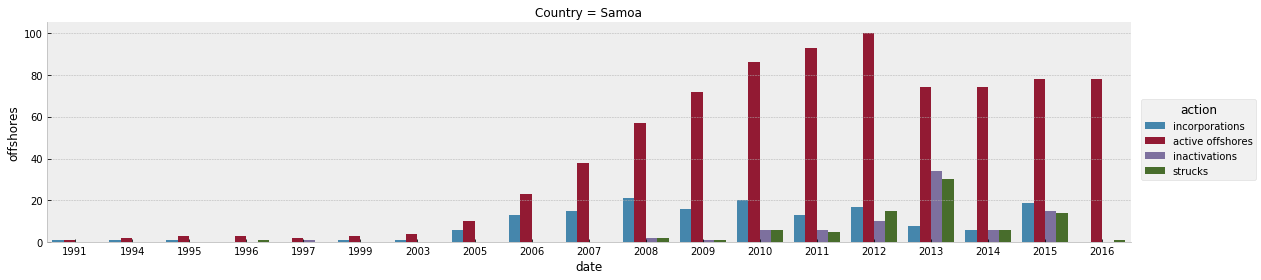

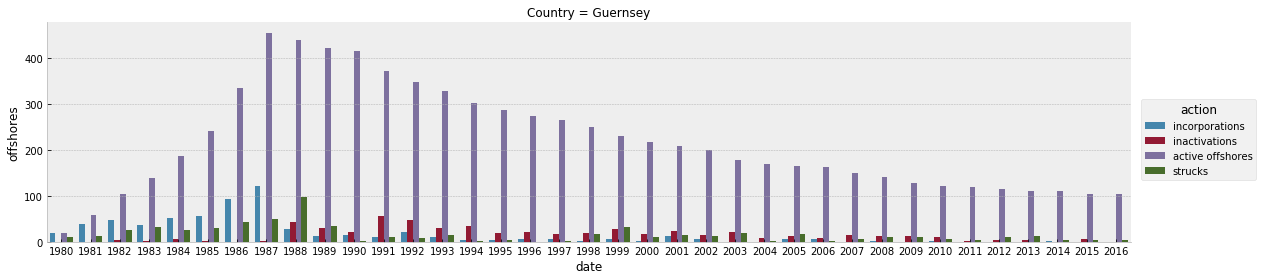

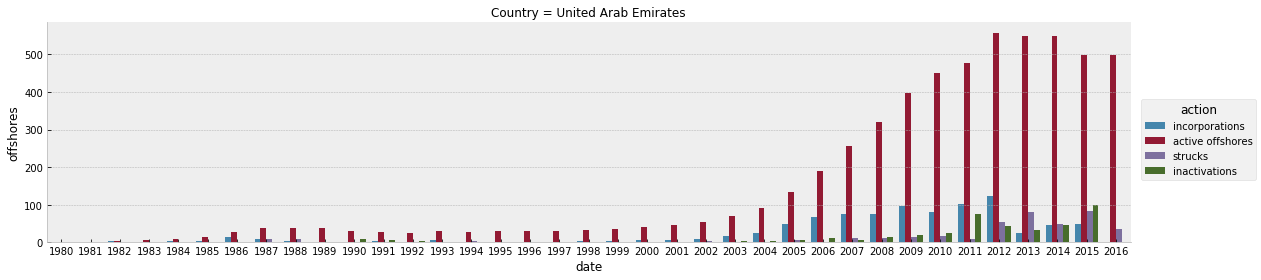

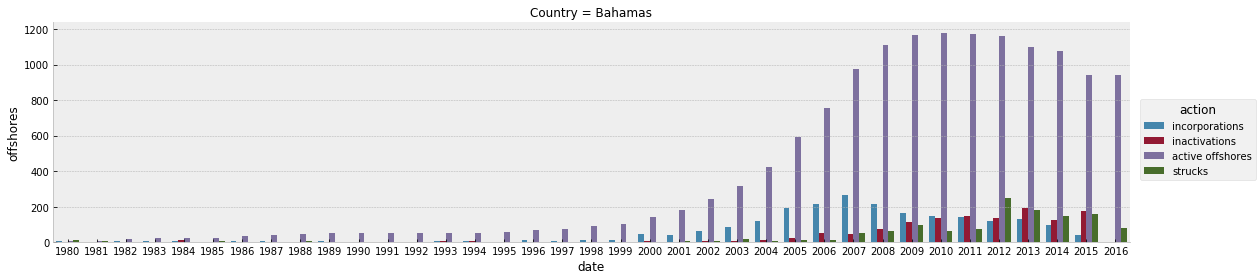

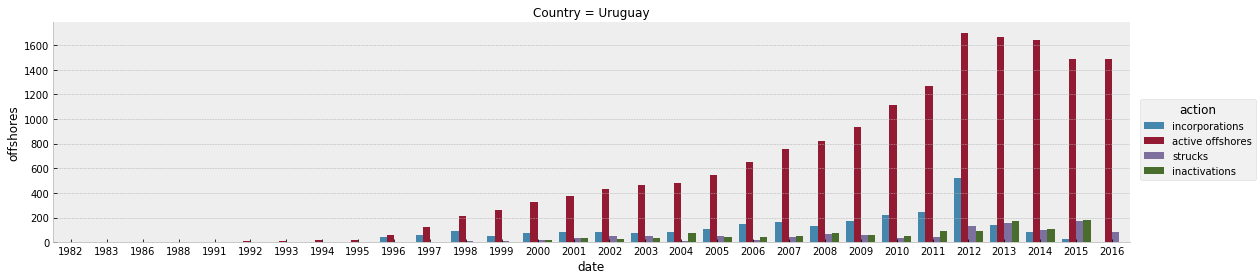

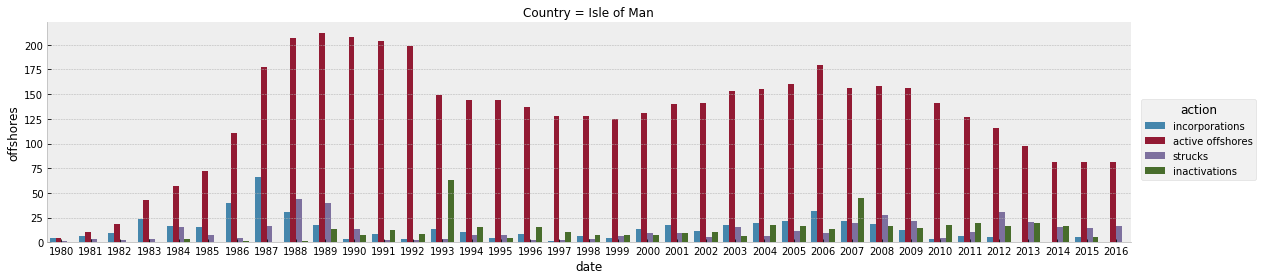

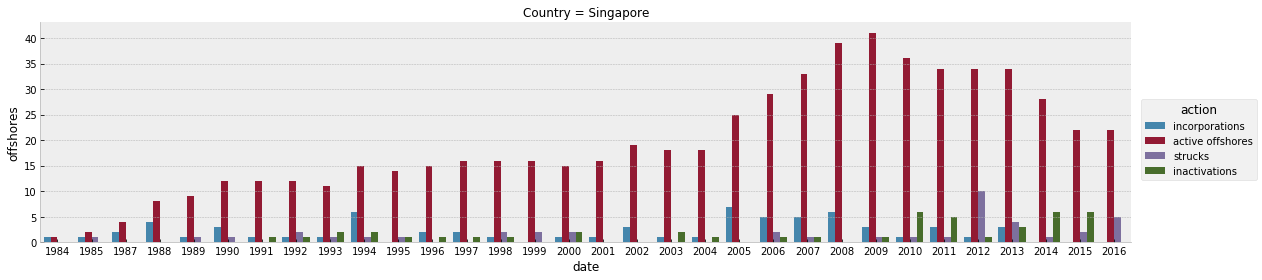

In [41]:
visualizer.visualize_countries_situation(countries_frame, divide_by='Country',selected_jurisdiction='Panama')

## Visualize flows with interactive map and pie chart.
___

### How to use it?

The [interactive widget](http://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html) provided by Jupyter notebook is used in this visualization to select one of the most involved countries.

Given one country it's possible to see its flow of _incorporations_, _inactivations_, _actives_ offshores in one specific year which is selectable with a bounded slider.

**Note**: The flow is represented by red arcs throughout the map. The opacity of each arc represent its weight over the total.

The Pie chart below displays the composition of the given flows in the specific country for each involved jurisdiction in that specific year.

### ⚠️ Warning : interactive visualization is only active if runned manually. Interactive widget not working in offline/nbviewer mode (for the moment) 


In [42]:
widget = interactive(visualizer.visualize_flow_by_country, country=most_involved_countries, year=(1950, 2016, 1), feat=['actives', 'incorporations','inactivations'])## Observations
display(widget)

A Jupyter Widget

In [43]:
visualizer.visualize_flow_by_country(country='Switzerland', feat='actives', year=2014)

Republic of Kosovo has problem with numeric code None


Total offshores in 2014 = 9502.0


## Observations

### Most important leaks
Here is a list of the most important leaks documented by the International Consortium of Investigative Journalists [ICIJ](https://offshoreleaks.icij.org/)
- **Bahamas Leak**
April 2, 2013
None got scared [Best year =  2010]
- **China Leak** ⭐️
January 21, 2014
More offshores [Seyschelles - Samoa - British Virgin Islands - British Anguila] 
- **Lux Leak** 
December 9, 2014
None got scared [Best year =  2007]
- **Swiss Leak** 
February 8, 2015 
None got scared [Best year =  2007]
- **Panama Leak**
April 3, 2016

#### Too early to state something precise, we will investigate the percentages for each country in each jurisdiction.
___

## Save CSV
This function is used to create the CSV used for the visualization. 

__No need to run it again since are already created and accessible__.

In [ ]:
entities = r'./panama_csv/Entities.csv'
entities = pd.read_csv(entities,index_col='name', header=0, low_memory=False)
entities=entities.rename(columns = {'countries':'Country','jurisdiction':'abbr_jurisd','jurisdiction_description':'jurisdiction'})
all_countries = entities.groupby('Country').count().index
features = ['active offshores', 'incorporations', 'inactivations']
for feature in features:
    frame = preprocessing.process_countries_with_code(entities, 
                                                            all_countries, 
                                                            analisys_on='Country', 
                                                            from_year=1900, 
                                                            to_year=2017,
                                                            feature=feature
                                                           )
    name = feature
    if name == 'active offshores':
        name = 'actives'
    frame.to_csv('csv/cash_flows_'+name+'.csv', index=False)

## Other further ideas

> ### [How much money do you need in order to make an offshore account worthwhile ?](http://www.macleans.ca/news/world/why-do-the-rich-hide-money-offshore-anyway/)
> ### The [Financial Secrecy Index](http://www.financialsecrecyindex.com/introduction/fsi-2015-results) can be useful to investigate differences between tax haven jurisdictions.